## Pathing Testbed

In [1]:
# Change path as needed
MAP_PATH = "../tests/pickle_data/AncientCisternAIE.xz"

In [2]:
# load cell magic things
%matplotlib widget
%load_ext line_profiler
%load_ext Cython

In [3]:
# imports
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np

from sc2.ids.unit_typeid import UnitTypeId
from sc2.bot_ai import BotAI
from sc2.position import Point2
from sc2.dicts.unit_trained_from import UNIT_TRAINED_FROM
from sc2.data import Race
from sc2.unit import Unit
from sc2.units import Units

from cython_extensions import cy_dijkstra

from tests.load_bot_from_pickle import get_map_specific_bot

In [4]:
# setup a burnysc2 BOTAI instance we can test with
bot: BotAI = get_map_specific_bot(MAP_PATH)

In [5]:
cost = np.where(bot.game_info.pathing_grid.data_numpy.T == 1, 1.0, np.inf)
# cost += np.random.lognormal(0, 1, size=cost.shape)
targets_test = np.array([u.position.rounded for u in bot.units if bot.in_pathing_grid(u)])

In [11]:
%%timeit
cy_dijkstra(cost, targets_test)

155 μs ± 632 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [20]:
pathing = cy_dijkstra(np.random.lognormal(size=bot.game_info.map_size), np.array(bot.game_info.start_locations).astype(int))

In [21]:
%%timeit
path = pathing.get_path(np.random.randint(0, high=bot.game_info.map_size), limit=2)

The slowest run took 4.68 times longer than the fastest. This could mean that an intermediate result is being cached.
24.3 μs ± 19 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


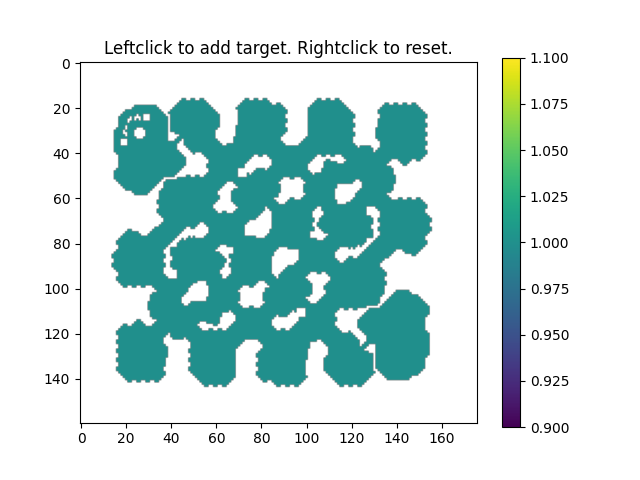

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [7]:
pathing = None
targets = set()
source = 0, 0

plt.ion()
fig, ax = plt.subplots()
ax.set_title("Leftclick to add target. Rightclick to reset.")
img = ax.imshow(cost, picker=True)
fig.colorbar(img)

def draw():
    if pathing is None:
        data = cost
    else:
        data = pathing.distance_lookahead.copy()
        for p in pathing.get_path(source):
            data[p] = -100
        for t in targets:
            data[t] = -100
    img.set_array(data)
    img.set_clim(vmax=np.ma.masked_invalid(data).max())
    fig.canvas.flush_events()
    
def pick_target(event):
    global pathing
    p = int(event.ydata), int(event.xdata)
    if event.button is MouseButton.LEFT:
        if cost[p] < np.inf:
            targets.add(p)
        pathing = cy_dijkstra(cost, np.array(list(targets)))
    elif event.button is MouseButton.RIGHT:
        targets.clear()
        pathing = None
    draw()

def pick_source(event):
    global source
    source = int(event.ydata), int(event.xdata)
    draw()

fig.canvas.mpl_connect('button_press_event', pick_target)
fig.canvas.mpl_connect('motion_notify_event', pick_source)
plt.show()